In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\sivacatering\Documents\Afitech attachments\projects\cardiovascular\cardio_train.csv",sep=";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
#Here there is no null values present

In [7]:
# there are some corrections need to be made

In [57]:
#age is given in days we need to convert that into years for easy understanding

In [9]:
data["age"]=data["age"]/365
data["age"]=data["age"].astype("int")

In [10]:
data=data.drop(columns=["id"])

In [11]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61,1,155,69.0,130,80,2,2,0,0,1,0
1,40,1,163,71.0,110,70,1,1,0,0,1,1
2,60,1,165,70.0,120,80,1,1,0,0,1,0
3,39,2,165,85.0,120,80,1,1,1,1,1,0
4,64,1,155,62.0,120,80,1,1,0,0,1,0


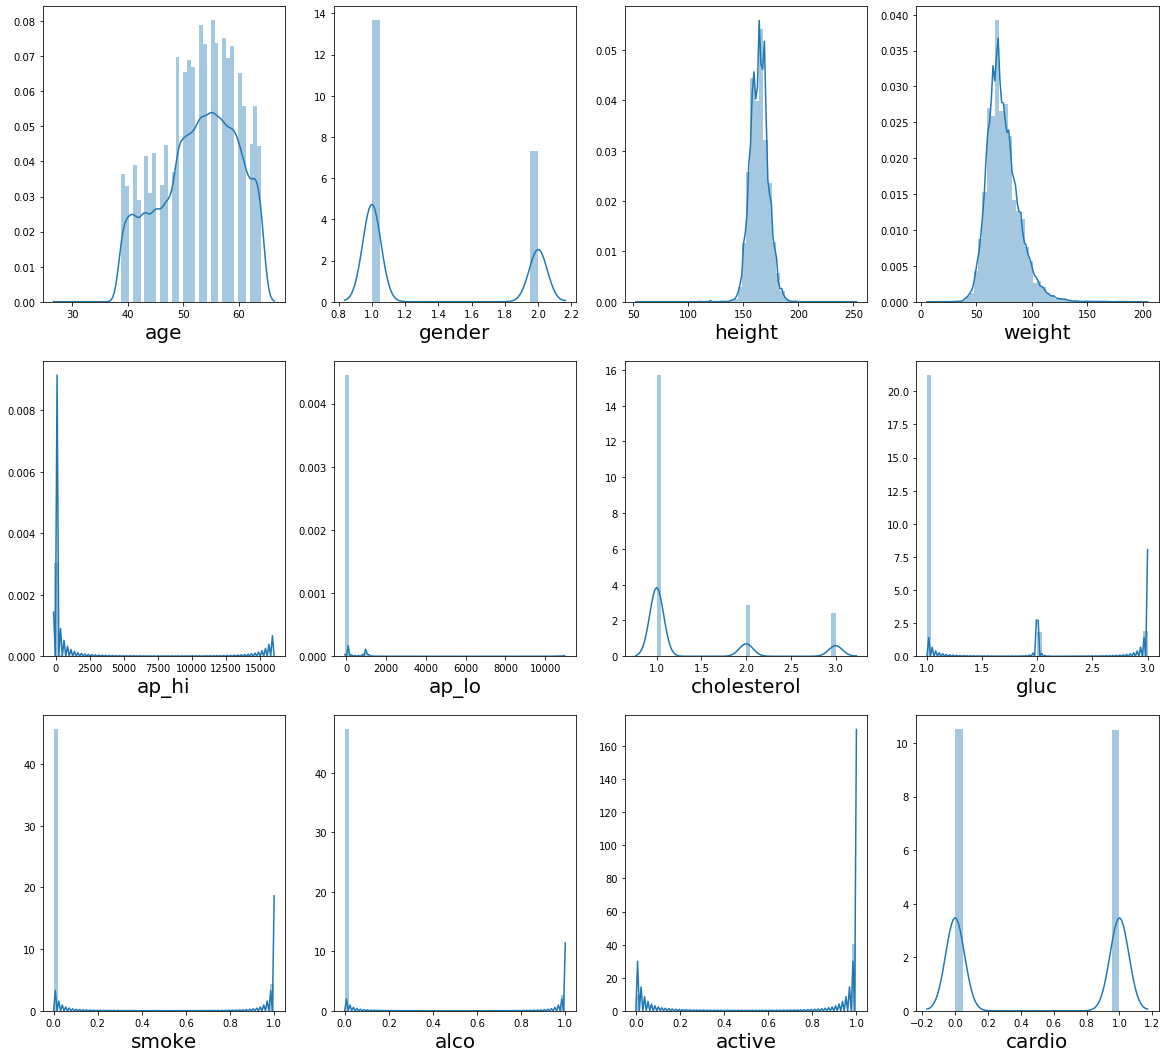

In [12]:
# visualization of how data is distributed in every column

plt.figure(figsize=(20,25), facecolor='w')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [58]:
#There are some skewness present in age,height,weight,app_hi,app_lo

## Visualization of outliers using boxplot

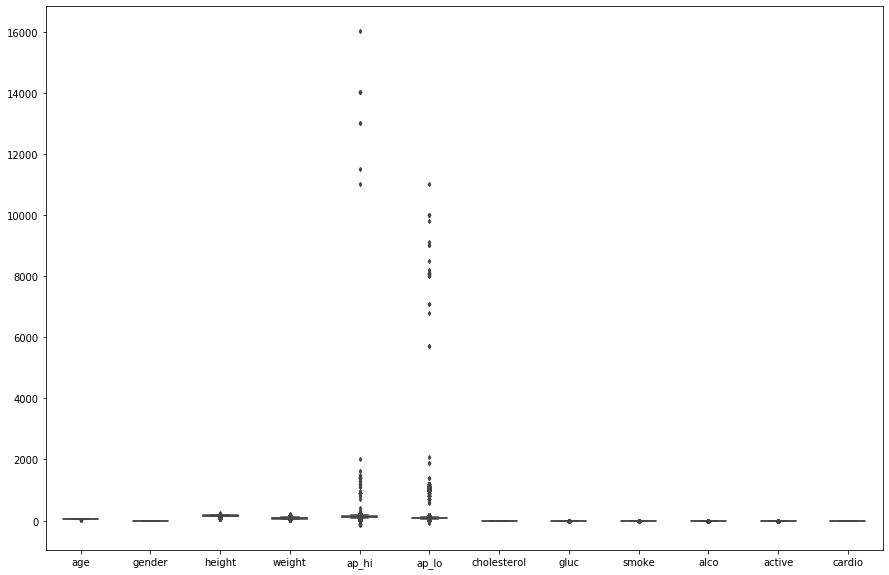

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

### Here we can see some outliers present in some features
### There are some abnormal values present in every data which not possible
### The systolic and diastolic pressure values have values in negative and some are abnormal
### I made a research on this features and tried to to reduce the outliers

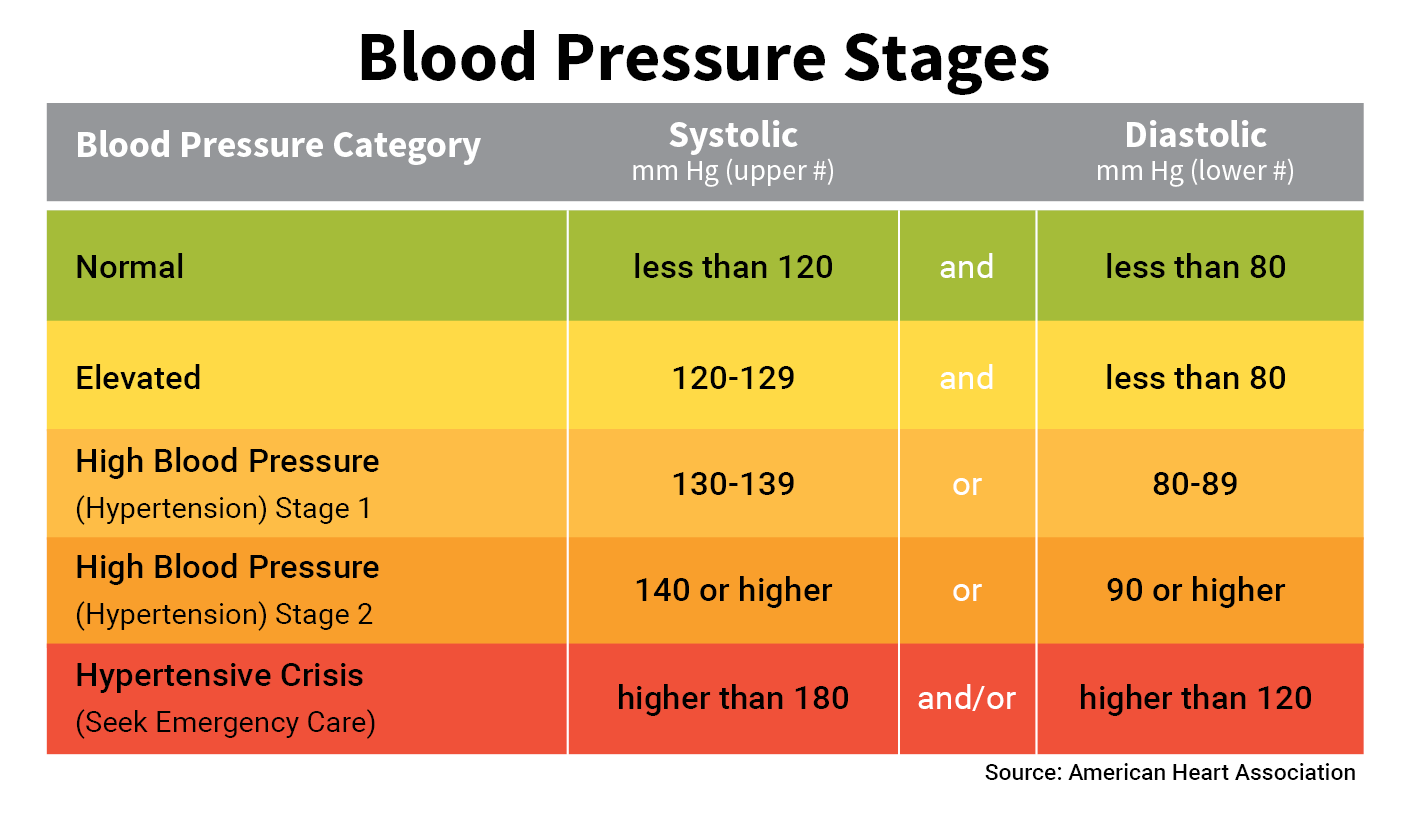
# Blood pressure range chart prepared by American Heart Association 

In [15]:
outlier = ((data["ap_hi"]>200) | (data["ap_lo"]>180) | (data["ap_lo"]<50) | (data["ap_hi"]<=80) | (data["height"]<=100)
             | (data["weight"]<=28) )
print("There is {} outlier".format(data[outlier]["cardio"].count()))

There is 1434 outlier


### We already have 69301 data and this 1434 is only a 2% of it.
### So we have enough data to train the model even if we remove these outliers.
### Without replacing values for these outliers we can remove it.

In [17]:
data = data[~outlier]

In [18]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67867.000000,67867.000000,67867.000000,67867.000000,67867.000000,67867.000000,67867.000000,67867.000000,67867.000000,67867.000000,67867.000000,67867.000000
mean,52.830404,1.348594,164.403495,74.123076,126.621819,81.348594,1.364507,1.225795,0.087819,0.053590,0.803734,0.494953
std,6.767229,0.476529,7.970591,14.284089,16.463751,9.483845,0.678976,0.571784,0.283033,0.225209,0.397175,0.499978
min,29.000000,1.000000,104.000000,29.000000,85.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,200.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


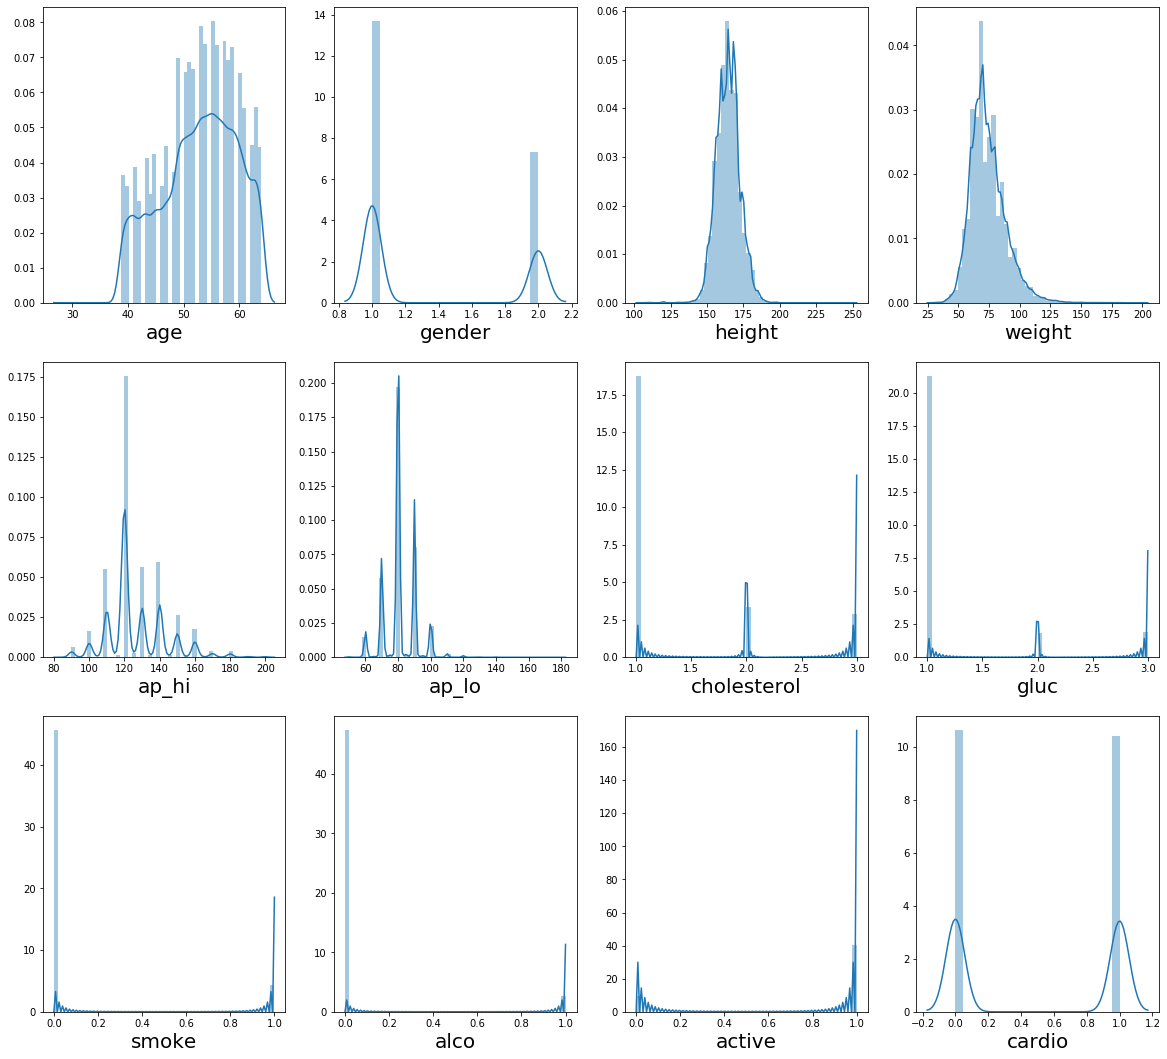

In [19]:
plt.figure(figsize=(20,25), facecolor='w')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Now the distribution seems to be okay, lets proceed with this data as we don't want to lose our data anymore.

In [21]:
X = data.drop(columns = ['cardio'])
y = data['cardio']

## Scatter plot to understand the relation between data

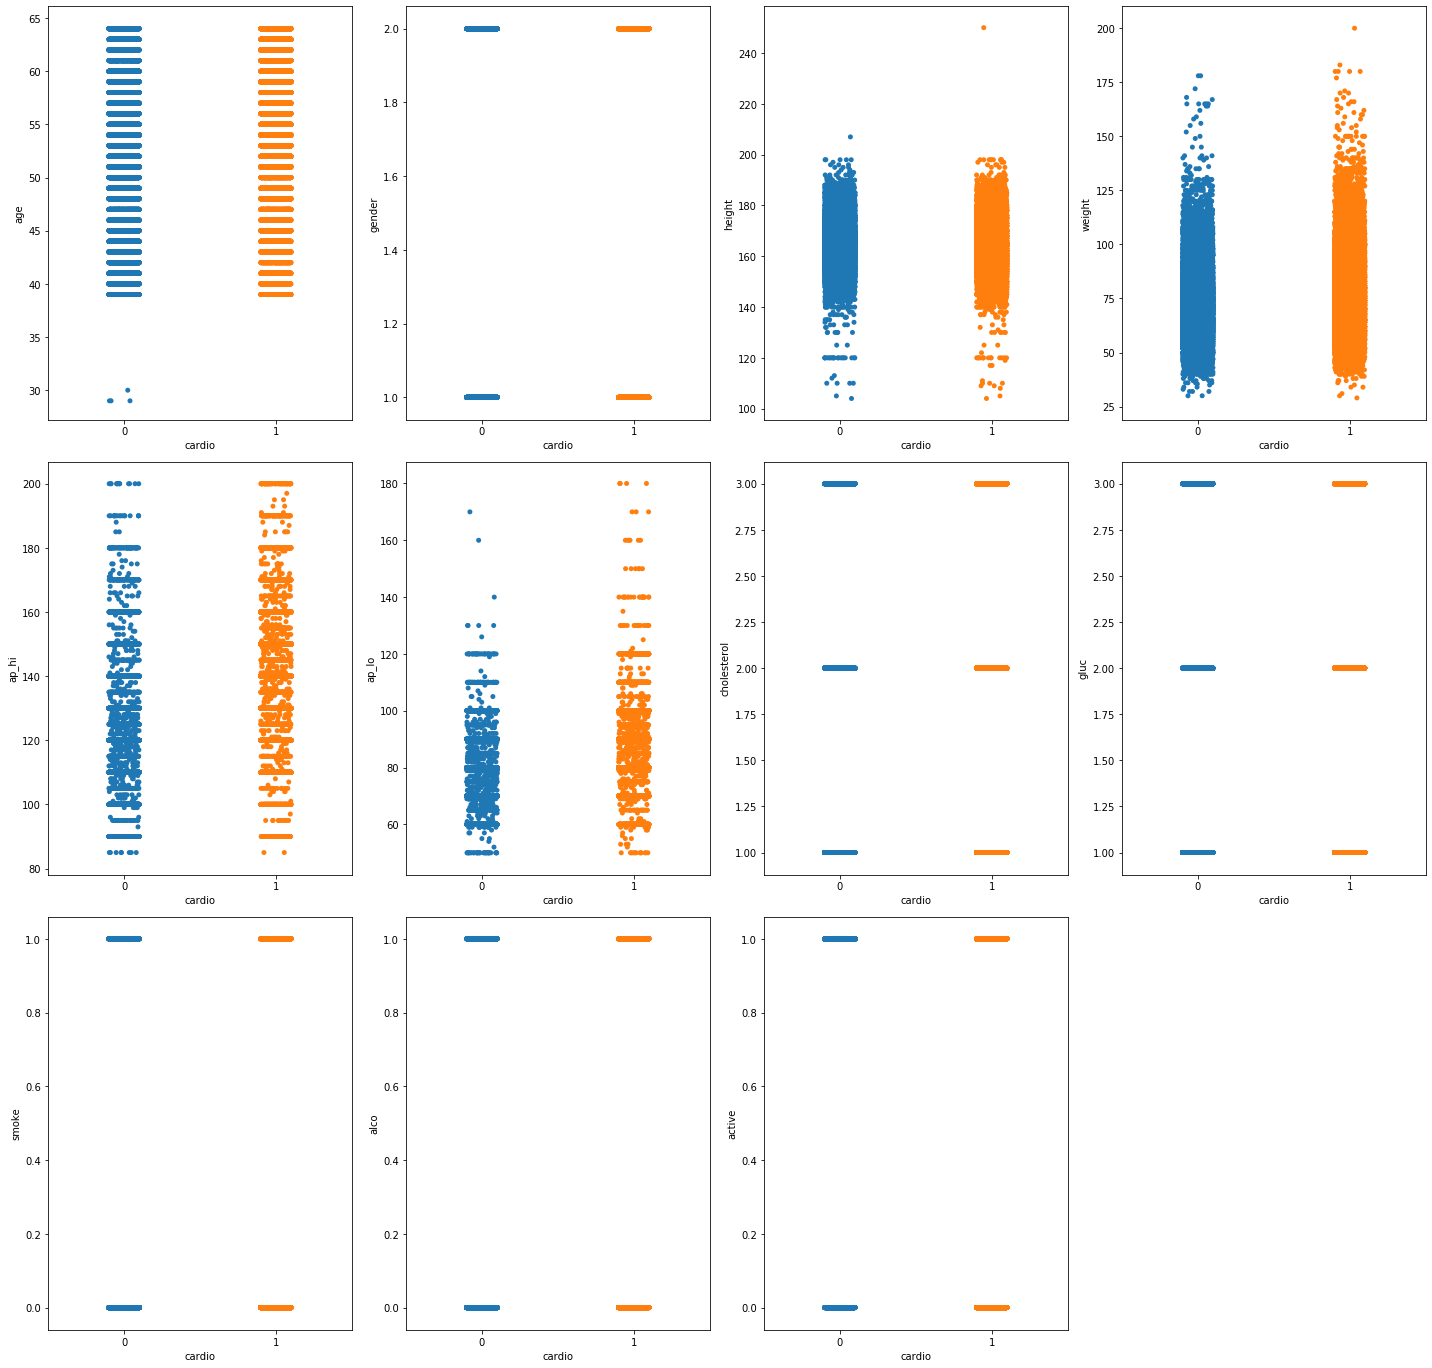

In [22]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

### From the graph we can see that if ap_lo is more than 120 there is high chance of cardio
### If the age is less 38 there is very less chance or no chance of cardio
### If the weight is more than 175 there is a chance of cardio

## Scaling of data

In [24]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
x_scaled=scalar.fit_transform(X)

In [25]:
x_scaled

array([[0.91428571, 0.        , 0.34931507, ..., 0.        , 0.        ,
        1.        ],
       [0.31428571, 0.        , 0.40410959, ..., 0.        , 0.        ,
        1.        ],
       [0.88571429, 0.        , 0.41780822, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.65714286, 1.        , 0.54109589, ..., 0.        , 1.        ,
        0.        ],
       [0.91428571, 0.        , 0.40410959, ..., 0.        , 0.        ,
        0.        ],
       [0.77142857, 0.        , 0.45205479, ..., 0.        , 0.        ,
        1.        ]])

## Heat map to check the multicollinearity

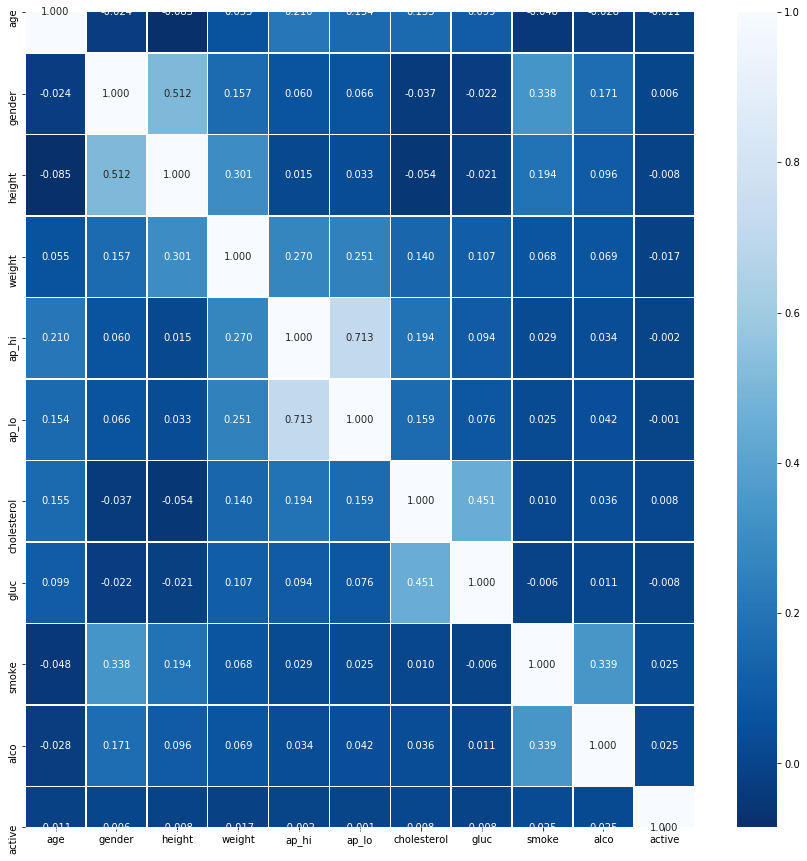

In [26]:
corr = X.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5,cmap="Blues_r", ax=ax)

### we can see that there is no much collinearity between any data

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve, roc_auc_score

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=420)

In [30]:
dtc = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=90)
knn = KNeighborsClassifier(n_neighbors=79)
svm = SVC(random_state=6)

In [31]:
models = {"Decision tree" : dtc,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm}
scores= { }

In [32]:
for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)

In [33]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
SVM,0.731300
KNN,0.725947
Random forest,0.707038
Decision tree,0.635676


In [55]:
from sklearn.metrics import plot_roc_curve

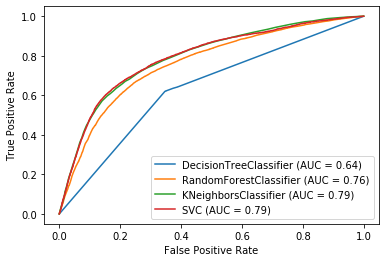

In [59]:
disp = plot_roc_curve(dtc,x_test,y_test)

plot_roc_curve(ran,x_test,y_test,ax=disp.ax_)

plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)

plot_roc_curve(svm,x_test,y_test,ax=disp.ax_)


### From the table and graph we can see that the SVM and KNN are performing better than other models

### As SVM has a high accuracy than others we can take svc and let's try to increase accuracy.

# Parameter tuning using Grid Search CV

In [37]:
param_grid={'C':[1,1.6,2,2.7],'gamma':[0.5,0.1,1,1.5,3.2]}

In [38]:
grid= GridSearchCV(SVC(),param_grid, verbose=3, n_jobs=-1)

In [39]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 82.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 1.6, 2, 2.7],
                         'gamma': [0.5, 0.1, 1, 1.5, 3.2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [40]:
grid.best_params_

{'C': 2, 'gamma': 1.5}

In [41]:
tune_grid=SVC(C=2, gamma=1.5)
tune_grid.fit(x_train,y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
tune_grid.score(x_train,y_train)

0.7364964425546247

In [42]:
tune_grid.score(x_test,y_test)

0.7318402828937675

In [43]:
prd=tune_grid.predict(x_test)

### Let's evaluate with other metrics

In [48]:
accuracy=accuracy_score(y_test,prd)
print("The accuracy in this data set is : ",accuracy)

The accuracy in this data set is :  0.7318402828937675


In [49]:
conf_mat = confusion_matrix(y_test,prd)
print("The Confusion Matrix for SVM in this dataset is : \n",conf_mat)

The Confusion Matrix for SVM in this dataset is : 
 [[8100 2127]
 [3333 6801]]


In [50]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [51]:
# Precison
Precision = true_positive/(true_positive+false_positive)
print("The precision of this dataset is : ",Precision)

The precision of this dataset is :  0.792021120563215


In [52]:
# Recall
Recall= true_positive/(true_positive+false_negative)
print("The Recall score of this dataset is : ",Recall)

The Recall score of this dataset is :  0.7084754657570191


In [54]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("The F1_Score for this dataset is : ",F1_Score)

The F1_Score for this dataset is :  0.7479224376731303


# Conclusion

### SVC gives a better result than other models, so we can take svc to predict whether a person has cardio or not with good accuracy.